# Linear Regression Demonstration

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Prepare initial data

In [52]:
n = 100
x = np.arange(n)
delta = np.random.uniform(-10, 10, n)
y = 0.4*x+3+delta

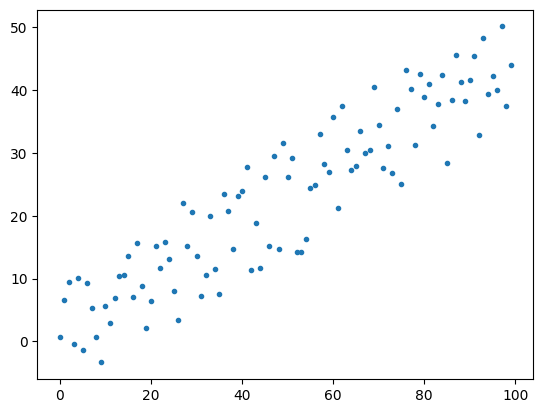

In [53]:
plt.plot(x,y, '.')

## Train Test Split

In [54]:
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.2)

## Minimized squared Loss Error
Formula for least squared error:
$$ L = \sum_{i=1}^n (y_i-a-bx_i)^2$$
Where a and b are parameters that we're going to estimate by taking their derivtive

$$\frac{dL}{da} = -2\sum_{i=1}^ny_i-a-bx_i$$
$$\frac{dL}{db} =-2\sum_{i=1}^n(y_i-a-bx_i)x_i$$
And we need to equate these two derivatives to 0. 
Then $$a = \frac{1}{n}\sum_{i=1}^ny_i-bx_i$$
$$b = \frac{1}{\sum_{i=1}^nx_i^2}\sum_{i=1}^n (y_i-a)x_i$$
We could transform the above equations as: 
$$na+b\sum_{i=1}^nx_i = \sum_{i=1}^ny_i$$
$$a\sum_{i=1}^nx_i+b\sum_{i=1}^nx_i^2=\sum_{i=1}^n x_iy_i$$

In [55]:
sum_x = sum(xtr)
sum_y = sum(ytr)
sum_xy = np.dot(xtr,ytr)
sum_xx = np.dot(xtr,xtr)
A = np.array([[n, sum_x], [sum_x, sum_xx]])
b = np.array([sum_y, sum_xy])
res = np.linalg.solve(A, b)
print(res)

[0.74675008 0.44919262]


In [56]:
y_pred = res[1]*xte+res[0]

## Calculate the root mean squared error (RMSE)
The formula of root mean squared error: 
$$RMSE = \sqrt{\frac{\sum(y-y_{pred})}{n-p}}$$
where: 
- $y$: the observed values
- $y_{pred}$: the predicted values
- $n$: number of observations
- $p$: number of estimated parameters

In [57]:
def rmse(y_pred, y_test):
    return sqrt(sum((y_pred-y_test)**2)/(n-2))

In [58]:
print(rmse(y_pred, yte))

2.83613438636092


## Validate our answer with linear regression package from sklearn

In [59]:
model = LinearRegression().fit(xtr.reshape(-1, 1), ytr)
print(model.intercept_, model.coef_)

1.4811914696809936 [0.43836209]


Consdiering the range of $y$, we may tolerate such small inaccuracy

We still would like to see the rmse score based on this

In [60]:
ym_pred = model.predict(xte.reshape(-1, 1))

In [61]:
print(rmse(ym_pred, yte))

2.81654049563408


Now we could say that our algorithm is almost as good as the linear regression model in sklearn package